# $$\text{Structural Causal Model}$$
# $$\text{of Instrumental Variables}$$

## $\text{Introduction}$
Curve-fitting promises that regularities in nature embody the concept of causality. As much as highly correlated events, such as cloudiness and rain, might lead us to think that the first causes the second, it doesn't tell us much about the mechanism by which this sequence of events occurs. Furthermore, mere associations -as strong as they might be- wouldn't offer us an explanation as to why witnessing clouds doesn't necessarily mean that it will rain.
Pearl et al. propose a framework to investigate these mechanisms based on statistical dependencies between variables. In other words, we can only discuss causality if a pair of variables X, Y are conditionally dependent. In such instances, we enumerate five possibilities:
- X causes Y
- Y causes X
- X and Y share a common cause
- X and Y are statistically dependent after conditioning on a variable Z that has both X and Y as causes (e.g., If we know that all Minervans are either smart or tall, selection bias occur when we condition on a person being a Minervan, our knowledge of their cognitive ability will infrom us about their height despite both being unconditionally independent).
- A combination of the above

The path to constructing a causal graph from observational data is known as **causal search** or **causal discovery**. Although a single dataset can have many potential causal graphs, our understanding of the phenomenon -even partially- would help us decide the most appropriate graph.

In this report, we first dive into the structural causal model concept, discuss its utility, and finally present an overview of instrumental variables as an application.

## $\text{Structural Causal Models}$
Pearl proposed a mechanism that would allow data scientists to craft conclusions that transcend associations and be able to pose queries on data rather than passively observing them. The idea is to construct a causal graph by which the data is believed to be generated, then expose it to observational data to deduce whether the links between variables are correctly drawn.
A causal graph is a set of nodes representing random variables (covariates) linked together with directed edges. Each edge reflects whether a variable is believed to cause another. In other words, if X has a directed edge towards Y, then our knowledge about X informs us about the state of the variable Y.
Before diving into examples of causal graphs, it's essential to showcase the ladder of causality proposed by Pearl. The ladder illustrates the levels of our understanding of a given phenomenon and the type of questions we can pose at each level.

1. **Associations:** refer to the pattern we observe in data with little to no information about the process by which they're generated. The sort of questions we can pose are merely about correlation of events e.g., what would observing clouds tell me about whether it would rain? what would a survey inform us about an election?

2. **Interventions:** At this stage we established our knowledge of the causal graph behind the data, and the question revolve around tweaking levers and observing how the model behaves e.g., if increase the temperature in the room, what would happen to the chocolat? how rising the interest rate affect the economic performance? Generally, it refers to the expected outcome after intervening in the system. As explained in the introduction, the causal search requires us to temper with the levers in the system to arrive at the most appropriate causal structure.

3. **Counterfactuals:** The top rung of the ladder include questions that about a world different from the one that generated the observations. Counterfactuals are investigating what would happen had we not intervened in a system. 

Structural causal graphs can take many shapes, but the main building blocks are:
1. **Chains:** Are a sequence of three variables or more with edges that have the same direction
![chain.png](https://raw.githubusercontent.com/Tahahaha7/Causal_Inference_Tutorial/master/Chain.png)
2. **Forks:** Also known as common cause structure when a variable has two directed edges towards two other variables
![fork.png](https://raw.githubusercontent.com/Tahahaha7/Causal_Inference_Tutorial/master/Forks.png)
3. **Colliders:** Are nodes that have two incoming directed edges from two different nodes
![collider.png](https://raw.githubusercontent.com/Tahahaha7/Causal_Inference_Tutorial/master/Colliders.png)

## $\text{Instrumental Variables (Theoritical Background)}$
The path between cause and effect can be paved with confounders, the challenge is to find an unbiased estimate of the causal effect without having to measure/control all variables in the system. Instrumental variables are common in social sciences studies as a strategy for finding Direct Causal Effect between two measureable variables $X \rightarrow Y$ without necessary measuring the confounder variable H.

Given the graph in following figure I will provide a theoretical proof that IV lead to an unbiased estimate of causal effect. However, the premise of IV rests on the following assumptions:
- The variables in the system have a linear function relationship, so is to say that the regression coefficient of Y on X is the same as the 
- The IV affect the outcome variable $Y$ only through the cause $X$ and doesn't have a direct effect to $Y$
- The IV doesn't affect the confounder variable $H$
- The effect of IV on $X$ is statistically significant

![graph.jpg](https://raw.githubusercontent.com/Tahahaha7/Causal_Inference_Tutorial/master/graph.jpg)

Assuming that the exogenous variables $N_{X}$ and $N_{Y}$ are Independent and identically distributed random variables and that the functional relationship between the variables is linear.

$$X=\alpha\cdot I+\beta\cdot H+N_x$$

$$Y=\delta\cdot X+\sigma\cdot H+N_y$$

The objective is to find the direct causal effect $\delta$ of $X$ on $Y$. First, we substitute $X$ into the equation of $Y$, it yeilds the following equation:

$$Y=\delta\left[\alpha\cdot I+\beta\cdot H+N_x\right]+\sigma\cdot H+N_y$$

We then factor out the remaining variables:
$$Y=\left[\delta\cdot\beta+\sigma\right]\cdot H+\delta\cdot\left[\alpha\cdot I\right]+\gamma\cdot N_x+N_y$$

Notice that $I$ is independent of $H$ which relates to our previous assumption that the Instrumental Variable doesn't affect the confounder variable of interest. The methodology then uses Two-Stage Least Squares to estimate the regression coefficient of I on X which is $\alpha$, then the fitted values $\alpha \cdot I$ will be regressed on Y to find $\delta$, our direct causal effect of $X$ on $Y$

## $\text{Instrumental Variables (Application)}$

One of the prominent research questions in labor economics is estimating how wage is determined by education and work experience. Card (1993) studies the economic return to schooling and uses proximity to college as an instrumental variable to account for confounders.
The dataset is a survey of high school graduates containing their wages, education, and other socio-economic metrics. The standard approach is to regress wages on education. However, education is not randomly assigned across the surveyed population, and we might fall for selection bias.

In [50]:
library(dagitty)
library(lavaan)
library(AER)
data("CollegeDistance")
summary(CollegeDistance)

    gender        ethnicity        score       fcollege   mcollege    home     
 male  :2139   other   :3050   Min.   :28.95   no :3753   no :4088   no : 852  
 female:2600   afam    : 786   1st Qu.:43.92   yes: 986   yes: 651   yes:3887  
               hispanic: 903   Median :51.19                                   
                               Mean   :50.89                                   
                               3rd Qu.:57.77                                   
                               Max.   :72.81                                   
 urban          unemp             wage           distance         tuition      
 no :3635   Min.   : 1.400   Min.   : 6.590   Min.   : 0.000   Min.   :0.2575  
 yes:1104   1st Qu.: 5.900   1st Qu.: 8.850   1st Qu.: 0.400   1st Qu.:0.4850  
            Median : 7.100   Median : 9.680   Median : 1.000   Median :0.8245  
            Mean   : 7.597   Mean   : 9.501   Mean   : 1.803   Mean   :0.8146  
            3rd Qu.: 8.900   3rd Qu.:10.

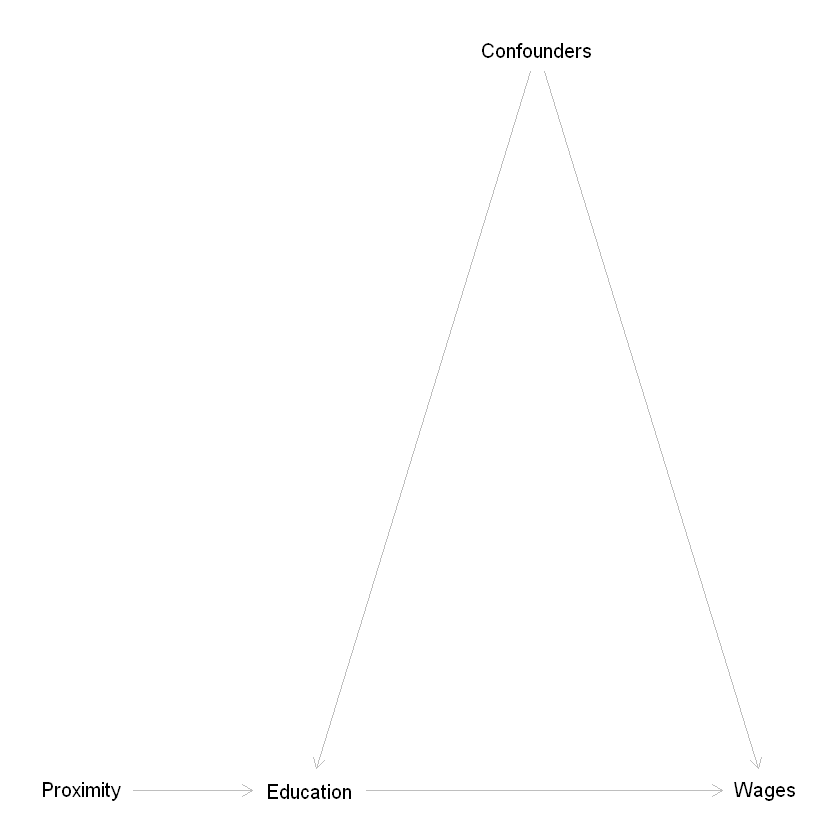

In [83]:
g <- dagitty('dag {
    Proximity [pos="0,1"]
    Education [pos="1,1"]
    Wages [pos="3,1"]
    Confounders [pos="2,0"]
    
    Proximity -> Education -> Wages
    Education <- Confounders -> Wages}')
plot(g)

In [86]:
impliedConditionalIndependencies(g)

Cnfn _||_ Prxm
Prxm _||_ Wags | Cnfn, Edct

In [87]:
adjustmentSets(g, "Education", "Wages", type="all" )

{ Confounders }
{ Confounders, Proximity }

In [67]:
# Regressing wage on education produces biased estimates
wage_model_1 <- lm(log(wage) ~ education, data = CollegeDistance)
summary(wage_model_1)


Call:
lm(formula = log(wage) ~ education, data = CollegeDistance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36208 -0.06271  0.03255  0.07794  0.32436 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.213220   0.016228 136.379   <2e-16 ***
education   0.002024   0.001166   1.737   0.0825 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1435 on 4737 degrees of freedom
Multiple R-squared:  0.0006364,	Adjusted R-squared:  0.0004254 
F-statistic: 3.016 on 1 and 4737 DF,  p-value: 0.08249


In [77]:
# Regressing wage on education and other metrics
wage_model_2 <- lm(log(wage) ~ unemp + ethnicity + gender + urban + education, data = CollegeDistance)
summary(wage_model_2)


Call:
lm(formula = log(wage) ~ unemp + ethnicity + gender + urban + 
    education, data = CollegeDistance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39998 -0.08223  0.02833  0.09486  0.37945 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.1519999  0.0168512 127.706   <2e-16 ***
unemp              0.0135938  0.0007203  18.874   <2e-16 ***
ethnicityafam     -0.0619139  0.0055990 -11.058   <2e-16 ***
ethnicityhispanic -0.0535204  0.0052237 -10.246   <2e-16 ***
genderfemale      -0.0091150  0.0039785  -2.291   0.0220 *  
urbanyes           0.0089393  0.0048005   1.862   0.0626 .  
education          0.0006723  0.0011121   0.605   0.5455    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1361 on 4732 degrees of freedom
Multiple R-squared:  0.1026,	Adjusted R-squared:  0.1015 
F-statistic:  90.2 on 6 and 4732 DF,  p-value: < 2.2e-16


In the simple model **wage_model_1**, the effect of education is estimated to be around 0.002. For a model including other covariates **wage_model_2**, the estimate for education's impact is approximately 0.0006. We notice that after including other variables, the effect of education was downgraded by three folds.

Proximity to schools can serve as an instrumental variable because it affects whether a person would attend college, but it doesn't affect wages directly (only through college attendance). Card (1993) argues that schools' geographical proximity offers us a lever to mitigate the selection bias among high school graduates.

The rationale is to regress education on school proximity, then regress wages on the fitted values to capture an unbiased, direct effect of education on wages. We will experiment with the built-in function for instrumental variables in R using the simple model (only education) and the general model (using other covariates)

In [75]:
# compute the correlation between proximity and education
print(cor(CollegeDistance$distance, CollegeDistance$education))

[1] -0.09318309


In [74]:
# Perform the first stage regression and compute the fraction of explained variation
R2 <- summary(lm(education ~ distance, data = CollegeDistance))$r.squared
print(R2)

[1] 0.008683088


In [72]:
# Estimate the IV regression of log(wage) on education using distance as the instrument
wage_iv1 <- ivreg(log(wage) ~ education | distance, data = CollegeDistance)
summary(wage_iv1)


Call:
ivreg(formula = log(wage) ~ education | distance, data = CollegeDistance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36022 -0.06094  0.03149  0.07747  0.32330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.221281   0.172731  12.860   <2e-16 ***
education   0.001441   0.012509   0.115    0.908    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1435 on 4737 degrees of freedom
Multiple R-Squared: 0.0005835,	Adjusted R-squared: 0.0003725 
Wald test: 0.01326 on 1 and 4737 DF,  p-value: 0.9083 


In [79]:
wage_iv2 <- ivreg(log(wage) ~ unemp + ethnicity + gender + urban + education |
                      . - education + distance, data = CollegeDistance)
summary(wage_iv2)


Call:
ivreg(formula = log(wage) ~ unemp + ethnicity + gender + urban + 
    education | . - education + distance, data = CollegeDistance)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.5885016 -0.1191974 -0.0001799  0.1452146  0.4576460 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.2171787  0.2018797   6.029 1.77e-09 ***
unemp              0.0142234  0.0009648  14.743  < 2e-16 ***
ethnicityafam     -0.0277621  0.0104342  -2.661  0.00782 ** 
ethnicityhispanic -0.0335043  0.0081520  -4.110 4.02e-05 ***
genderfemale      -0.0076101  0.0052865  -1.440  0.15007    
urbanyes           0.0064494  0.0063892   1.009  0.31283    
education          0.0673242  0.0143812   4.681 2.93e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1805 on 4732 degrees of freedom
Multiple R-Squared: -0.5786,	Adjusted R-squared: -0.5806 
Wald test: 54.89 on 6 and 4732 DF,  p-value: < 2.

The estimate of education in the IV model is statistically significant compared to the biased model. The effect of education on wages is higher than any other predictor (0.0673***), which complies with our perception that education would have a crucial role in wage estimate predictions.